# Mel Jensen

## Research question/interests

My main research question is 'Is there a link between the different age groups and their personality traits?' I am interested in this as I want to see if there is a link between the age of people and what their traits are. This could show if there is any link between how someone was raised, I.E. what parenting style was used at that time, and how they now behave. This could show if there is any truth behind statments people try to make about this, like "When I was a kid...".

I am going to average the collected data between each personality trait and compare it to the ages of the participants.

In [1]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = ('../data/raw/data.csv')
df = pd.read_csv(file, sep='\t')

df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## EDA

In [3]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

## I need to remove rows that have a 0 as 0 indicates missed values

In [4]:
dfnoZero = df.loc[(df!=0).all(axis=1)]
dfnoZero.index=range(19384)
dfnoZero

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19380,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19381,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19382,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Defining which columns go with which trait
### E = Extroversion
### N = Neruoticism
### A = Agreeableness
### C = Conscientiousness
### O = Openness to Experience

## Which columns are positive vs negative attributes
A1 -  &nbsp; &nbsp;E1 +  &nbsp; &nbsp;C1 +<br/>
A2 +  &nbsp; &nbsp;E2 -  &nbsp; &nbsp;C2 -<br/>
A3 -  &nbsp; &nbsp;E3 +  &nbsp; &nbsp;C3 +<br/>
A4 +  &nbsp; &nbsp;E4 -  &nbsp; &nbsp;C4 -<br/>
A5 -  &nbsp; &nbsp;E5 +  &nbsp; &nbsp;C5 +<br/>
A6 +  &nbsp; &nbsp;E6 -  &nbsp; &nbsp;C6 -<br/>
A7 -  &nbsp; &nbsp;E7 +  &nbsp; &nbsp;C7 +<br/>
A8 +  &nbsp; &nbsp;E8 -  &nbsp; &nbsp;C8 -<br/>
A9 +  &nbsp; &nbsp;E9 +  &nbsp; &nbsp;C9 +<br/>
A10 +  &nbsp; &nbsp;E10 -  &nbsp; &nbsp;C10 +<br/>
O1 +  &nbsp; &nbsp;N1 -  &nbsp; &nbsp;<br/>
O2 -  &nbsp; &nbsp;N2 +  &nbsp; &nbsp;<br/>
O3 +  &nbsp; &nbsp;N3 -  &nbsp; &nbsp;<br/>
O4 -  &nbsp; &nbsp;N4 +  &nbsp; &nbsp;<br/>
O5 +  &nbsp; &nbsp;N5 -  &nbsp; &nbsp;<br/>
O6 -  &nbsp; &nbsp;N6 -  &nbsp; &nbsp;<br/>
O7 +  &nbsp; &nbsp;N7 -  &nbsp; &nbsp;<br/>
O8 +  &nbsp; &nbsp;N8 -  &nbsp; &nbsp;<br/>
O9 +  &nbsp; &nbsp;N9 -  &nbsp; &nbsp;<br/>
O10 +  &nbsp; &nbsp;N10 -  &nbsp; &nbsp;<br/>

In [5]:
## From these I need to pull the values convert them to negative values if needed

NewA1=-(dfnoZero['A1'])
NewA2=(dfnoZero['A2'])
NewA3=-(dfnoZero['A3'])
NewA4=(dfnoZero['A4'])
NewA5=-(dfnoZero['A5'])
NewA6=(dfnoZero['A6'])
NewA7=-(dfnoZero['A7'])
NewA8=(dfnoZero['A8'])
NewA9=(dfnoZero['A9'])
NewA10=(dfnoZero['A10'])
NewO1=(dfnoZero['O1'])
NewO2=-(dfnoZero['O2'])
NewO3=(dfnoZero['O3'])
NewO4=-(dfnoZero['O4'])
NewO5=(dfnoZero['O5'])
NewO6=-(dfnoZero['O6'])
NewO7=(dfnoZero['O7'])
NewO8=(dfnoZero['O8'])
NewO9=(dfnoZero['O9'])
NewO10=(dfnoZero['O10'])
NewE1=(dfnoZero['E1'])
NewE2=-(dfnoZero['E2'])
NewE3=(dfnoZero['E3'])
NewE4=-(dfnoZero['E4'])
NewE5=(dfnoZero['E5'])
NewE6=-(dfnoZero['E6'])
NewE7=(dfnoZero['E7'])
NewE8=-(dfnoZero['E8'])
NewE9=(dfnoZero['E9'])
NewE10=-(dfnoZero['E10'])
NewN1=-(dfnoZero['N1'])
NewN2=(dfnoZero['N2'])
NewN3=-(dfnoZero['N3'])
NewN4=(dfnoZero['N4'])
NewN5=-(dfnoZero['N5'])
NewN6=-(dfnoZero['N6'])
NewN7=-(dfnoZero['N7'])
NewN8=-(dfnoZero['N8'])
NewN9=-(dfnoZero['N9'])
NewN10=-(dfnoZero['N10'])
NewC1=(dfnoZero['C1'])
NewC2=-(dfnoZero['C2'])
NewC3=(dfnoZero['C3'])
NewC4=-(dfnoZero['C4'])
NewC5=(dfnoZero['C5'])
NewC6=-(dfnoZero['C6'])
NewC7=(dfnoZero['C7'])
NewC8=-(dfnoZero['C8'])
NewC9=(dfnoZero['C9'])
NewC10=(dfnoZero['C10'])

In [6]:
## Dataframe with A values
Aframes=[NewA1, NewA2, NewA3, NewA4, NewA5, NewA6, NewA7, NewA8, NewA9, NewA10]
Aframe = pd.concat(Aframes, axis=1)

In [7]:
## Dataframe with O values
Oframes=[NewO1, NewO2, NewO3, NewO4, NewO5, NewO6, NewO7, NewO8, NewO9, NewO10]
Oframe = pd.concat(Oframes, axis=1)

In [8]:
## Dataframe with E values
Eframes=[NewE1, NewE2, NewE3, NewE4, NewE5, NewE6, NewE7, NewE8, NewE9, NewE10]
Eframe = pd.concat(Eframes, axis=1)

In [9]:
## Dataframe with N values
Nframes=[NewN1, NewN2, NewN3, NewN4, NewN5, NewN6, NewN7, NewN8, NewN9, NewN10]
Nframe = pd.concat(Nframes, axis=1)

In [10]:
## Dataframe with C values
Cframes=[NewC1, NewC2, NewC3, NewC4, NewC5, NewC6, NewC7, NewC8, NewC9, NewC10]
Cframe = pd.concat(Cframes, axis=1)

In [11]:
## Sum A values
sumA = Aframe.sum(axis = 1)

In [12]:
## Sum O values
sumO = Oframe.sum(axis = 1)

In [13]:
## Sum E values
sumE = Eframe.sum(axis = 1)

In [14]:
## Sum N values
sumN = Nframe.sum(axis = 1)

In [15]:
## Sum C values
sumC = Cframe.sum(axis = 1)

In [16]:
## Dataframe with total scores
sumframes=[sumA, sumO, sumE, sumN, sumC]
sumframe = pd.concat(sumframes, axis=1)
sumframe = sumframe.rename(columns={0:'sumA', 1:'sumO', 2:'sumE', 3:'sumN', 4:'sumC'})
sumframe

,sumA,sumO,sumE,sumN,sumC
0,22,25,14,1,23
1,11,8,-8,-19,18
2,14,27,5,-34,25
3,13,23,-8,-31,2
4,20,16,4,-18,10
...,...,...,...,...,...
19379,18,17,-9,-29,12
19380,12,12,-5,-9,8
19381,2,19,-9,-38,-1
19382,14,24,-9,-28,19


In [17]:
## Check the range of scores
print(f' The max score of A is {max(sumA)}')
print(f' The max score of O is {max(sumO)}')
print(f' The max score of E is {max(sumE)}')
print(f' The max score of N is {max(sumN)}')
print(f' The max score of C is {max(sumC)}')
print(f' The min score of A is {min(sumA)}')
print(f' The min score of O is {min(sumO)}')
print(f' The min score of E is {min(sumE)}')
print(f' The min score of N is {min(sumN)}')
print(f' The min score of C is {min(sumC)}')

 The max score of A is 26
 The max score of O is 32
 The max score of E is 20
 The max score of N is 2
 The max score of C is 26
 The min score of A is -14
 The min score of O is -8
 The min score of E is -20
 The min score of N is -38
 The min score of C is -14


In [18]:
#This will probably get cut (until next comment)
AO = sumframe['sumA'].corr(sumframe['sumO'])
AE = sumframe['sumA'].corr(sumframe['sumE'])
AN = sumframe['sumA'].corr(sumframe['sumN'])
AC = sumframe['sumA'].corr(sumframe['sumC'])

In [19]:
OA = sumframe['sumO'].corr(sumframe['sumA'])
OE = sumframe['sumO'].corr(sumframe['sumE'])
ON = sumframe['sumO'].corr(sumframe['sumN'])
OC = sumframe['sumO'].corr(sumframe['sumC'])

In [20]:
EA = sumframe['sumE'].corr(sumframe['sumA'])
EO = sumframe['sumE'].corr(sumframe['sumO'])
EN = sumframe['sumE'].corr(sumframe['sumN'])
EC = sumframe['sumE'].corr(sumframe['sumC'])

In [21]:
NA = sumframe['sumN'].corr(sumframe['sumA'])
NO = sumframe['sumN'].corr(sumframe['sumO'])
NE = sumframe['sumN'].corr(sumframe['sumE'])
NC = sumframe['sumN'].corr(sumframe['sumC'])

In [22]:
CA = sumframe['sumC'].corr(sumframe['sumA'])
CO = sumframe['sumC'].corr(sumframe['sumO'])
CE = sumframe['sumC'].corr(sumframe['sumE'])
CN = sumframe['sumC'].corr(sumframe['sumN'])

In [23]:
print(f'Correlation between A trait and O trait is {AO}')
print(f'Correlation between A trait and E trait is {AE}')
print(f'Correlation between A trait and N trait is {AN}')
print(f'Correlation between A trait and C trait is {AC}')
print(f'Correlation between O trait and A trait is {OA}')
print(f'Correlation between O trait and E trait is {OE}')
print(f'Correlation between O trait and N trait is {ON}')
print(f'Correlation between O trait and C trait is {OC}')
print(f'Correlation between E trait and A trait is {EA}')
print(f'Correlation between E trait and O trait is {EO}')
print(f'Correlation between E trait and N trait is {EN}')
print(f'Correlation between E trait and C trait is {EC}')
print(f'Correlation between N trait and A trait is {NA}')
print(f'Correlation between N trait and O trait is {NO}')
print(f'Correlation between N trait and E trait is {NE}')
print(f'Correlation between N trait and C trait is {NC}')
print(f'Correlation between C trait and A trait is {CA}')
print(f'Correlation between C trait and O trait is {CO}')
print(f'Correlation between C trait and E trait is {CE}')
print(f'Correlation between C trait and N trait is {CN}')
#to here getting cut, but leaving for now

Correlation between A trait and O trait is 0.11747393711168523
Correlation between A trait and E trait is 0.3321494908212322
Correlation between A trait and N trait is 0.11124497299425165
Correlation between A trait and C trait is 0.17541079853030112
Correlation between O trait and A trait is 0.11747393711168524
Correlation between O trait and E trait is 0.16542777732714636
Correlation between O trait and N trait is 0.09976012319859864
Correlation between O trait and C trait is 0.08583733226917369
Correlation between E trait and A trait is 0.3321494908212322
Correlation between E trait and O trait is 0.16542777732714634
Correlation between E trait and N trait is 0.2623570118284341
Correlation between E trait and C trait is 0.10667007206834368
Correlation between N trait and A trait is 0.11124497299425165
Correlation between N trait and O trait is 0.09976012319859866
Correlation between N trait and E trait is 0.26235701182843413
Correlation between N trait and C trait is 0.2595399480511

In [24]:
# Pull the age data from the non-zero dataframe
ageframe=(dfnoZero['age'])
ageframe

0        53
1        46
2        14
3        19
4        25
         ..
19379    15
19380    37
19381    16
19382    16
19383    35
Name: age, Length: 19384, dtype: int64

In [25]:
# Merge the scores and ages into new data frame
agevpers = [sumframe, ageframe]
agevpersonality = pd.concat(agevpers, axis=1)

In [26]:
#Sort the data to veiw it easier
sortedAge = agevpersonality.sort_values(by=['age'])
sortedAge.index=range(19384)
sortedAge

,sumA,sumO,sumE,sumN,sumC,age
0,17,30,7,-1,17,13
1,12,17,3,-11,4,13
2,0,25,-10,-32,-3,13
3,3,21,-12,-27,16,13
4,18,28,-11,-8,20,13
...,...,...,...,...,...,...
19379,5,8,-7,-22,5,1998
19380,8,10,-7,-13,11,1999
19381,9,13,4,-5,7,2000
19382,19,27,-8,-6,8,412434


## Delete ages that are over 100 (less likely to be a proper data entry)

In [27]:
# I noticed that some of the ages were incorrect values (ex. 999999999, and values that looked like birth years)
# So I took out this data
usableData = sortedAge[sortedAge.age <= 100]
usableData.index=range(19305)
usableData

,sumA,sumO,sumE,sumN,sumC,age
0,17,30,7,-1,17,13
1,12,17,3,-11,4,13
2,0,25,-10,-32,-3,13
3,3,21,-12,-27,16,13
4,18,28,-11,-8,20,13
...,...,...,...,...,...,...
19300,15,8,7,-15,2,80
19301,10,20,0,-30,10,92
19302,6,12,0,-18,6,97
19303,21,31,7,-23,20,99


In [28]:
#Just to see how many different data points were in each column
usableData.nunique(axis=0)

sumA    41
sumO    40
sumE    41
sumN    41
sumC    41
age     71
dtype: int64

In [29]:
# What those data values are
print(usableData.apply(lambda col: col.unique()))

sumA    [17, 12, 0, 3, 18, 10, -14, 8, 9, 14, 15, 16, ...
sumO    [30, 17, 25, 21, 28, 24, 20, 23, 9, 19, 27, 18...
sumE    [7, 3, -10, -12, -11, 0, -16, -5, -3, 9, -2, 6...
sumN    [-1, -11, -32, -27, -8, -25, -19, -3, -29, -28...
sumC    [17, 4, -3, 16, 20, 5, 2, 21, 14, 11, 9, 13, 7...
age     [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...
dtype: object


In [30]:
# Sort the data by age group
age1319 = sortedAge[sortedAge.age < 20]

age2029 = sortedAge[sortedAge.age < 30]
age2029 = age2029[age2029.age >= 20]

age3039 = sortedAge[sortedAge.age < 40]
age3039 = age3039[age3039.age >= 30]

age4049 = sortedAge[sortedAge.age < 50]
age4049 = age4049[age4049.age >= 40]

age5059 = sortedAge[sortedAge.age < 60]
age5059 = age5059[age5059.age >= 50]

age6069 = sortedAge[sortedAge.age < 70]
age6069 = age6069[age6069.age >= 60]

age7079 = sortedAge[sortedAge.age < 80]
age7079 = age7079[age7079.age >= 70]

age8089 = sortedAge[sortedAge.age < 90]
age8089 = age8089[age8089.age >= 80]

age90100 = sortedAge[sortedAge.age <= 100]
age90100 = age90100[age90100.age >= 90]


In [31]:
# Find the length of these group so I can average them
print(age1319.shape)
print(age2029.shape)
print(age3039.shape)
print(age4049.shape)
print(age5059.shape)
print(age6069.shape)
print(age7079.shape)
print(age8089.shape)
print(age90100.shape)

(6642, 6)
(7428, 6)
(2514, 6)
(1516, 6)
(870, 6)
(287, 6)
(43, 6)
(1, 6)
(4, 6)


In [32]:
# Average of each age groups total scores
teensA = sum(age1319['sumA'])/6642
teensO = sum(age1319['sumO'])/6642
teensE = sum(age1319['sumE'])/6642
teensN = sum(age1319['sumN'])/6642
teensC = sum(age1319['sumC'])/6642
twentysA = sum(age2029['sumA'])/7428
twentysO = sum(age2029['sumO'])/7428
twentysE = sum(age2029['sumE'])/7428
twentysN = sum(age2029['sumN'])/7428
twentysC = sum(age2029['sumC'])/7428
thirtysA = sum(age3039['sumA'])/2514
thirtysO = sum(age3039['sumO'])/2514
thirtysE = sum(age3039['sumE'])/2514
thirtysN = sum(age3039['sumN'])/2514
thirtysC = sum(age3039['sumC'])/2514
fortysA = sum(age4049['sumA'])/1516
fortysO = sum(age4049['sumO'])/1516
fortysE = sum(age4049['sumE'])/1516
fortysN = sum(age4049['sumN'])/1516
fortysC = sum(age4049['sumC'])/1516
fiftysA = sum(age5059['sumA'])/870
fiftysO = sum(age5059['sumO'])/870
fiftysE = sum(age5059['sumE'])/870
fiftysN = sum(age5059['sumN'])/870
fiftysC = sum(age5059['sumC'])/870
sixtysA = sum(age6069['sumA'])/287
sixtysO = sum(age6069['sumO'])/287
sixtysE = sum(age6069['sumE'])/287
sixtysN = sum(age6069['sumN'])/287
sixtysC = sum(age6069['sumC'])/287
seventysA = sum(age7079['sumA'])/43
seventysO = sum(age7079['sumO'])/43
seventysE = sum(age7079['sumE'])/43
seventysN = sum(age7079['sumN'])/43
seventysC = sum(age7079['sumC'])/43
eightysA = sum(age8089['sumA'])/1
eightysO = sum(age8089['sumO'])/1
eightysE = sum(age8089['sumE'])/1
eightysN = sum(age8089['sumN'])/1
eightysC = sum(age8089['sumC'])/1
ninetysA = sum(age90100['sumA'])/4
ninetysO = sum(age90100['sumO'])/4
ninetysE = sum(age90100['sumE'])/4
ninetysN = sum(age90100['sumN'])/4
ninetysC = sum(age90100['sumC'])/4

In [33]:
# create data frame from these averages
teens = pd.DataFrame({'A':[teensA], 'O':[teensO], 'E':[teensE], 'N':[teensN], 'C':[teensC], 'age':'13-19'})

twentys = pd.DataFrame({'A':[twentysA], 'O':[twentysO], 'E':[twentysE], 'N':[twentysN], 'C':[twentysC], 'age':'20-29'})

thirtys = pd.DataFrame({'A':[thirtysA], 'O':[thirtysO], 'E':[thirtysE], 'N':[thirtysN], 'C':[thirtysC], 'age':'30-39'})

fortys = pd.DataFrame({'A':[fortysA], 'O':[fortysO], 'E':[fortysE], 'N':[fortysN], 'C':[fortysC], 'age':'40-49'})

fiftys = pd.DataFrame({'A':[fiftysA], 'O':[fiftysO], 'E':[fiftysE], 'N':[fiftysN], 'C':[fiftysC], 'age':'50-59'})

sixtys = pd.DataFrame({'A':[sixtysA], 'O':[sixtysO], 'E':[sixtysE], 'N':[sixtysN], 'C':[sixtysC], 'age':'60-69'})

seventys = pd.DataFrame({'A':[seventysA], 'O':[seventysO], 'E':[seventysE], 'N':[seventysN], 'C':[seventysC], 'age':'70-79'})

eightys = pd.DataFrame({'A':[eightysA], 'O':[eightysO], 'E':[eightysE], 'N':[eightysN], 'C':[eightysC], 'age':'80-89'})

ninetys = pd.DataFrame({'A':[ninetysA], 'O':[ninetysO], 'E':[ninetysE], 'N':[ninetysN], 'C':[ninetysC], 'age':'90-100'})


In [34]:
#combine these frames to create the dataframe with just the data I want to use
agevper=[teens, twentys, thirtys, fortys, fiftys, sixtys, seventys, eightys, ninetys]
agevperson = pd.concat(agevper, axis=0)
agevperson

,A,O,E,N,C,age
0,13.254140,20.548630,-0.962060,-20.301566,7.664709,13-19
0,14.444534,21.012789,0.204631,-19.081449,9.497577,20-29
0,15.367542,21.902944,0.665871,-18.115752,11.022275,30-39
0,16.114776,22.067942,1.747361,-16.866095,11.982850,40-49
0,16.997701,22.039080,2.581609,-15.300000,12.720690,50-59
0,17.432056,22.059233,1.637631,-15.275261,12.494774,60-69
0,16.860465,20.000000,-0.395349,-16.813953,12.651163,70-79
0,15.000000,8.000000,7.000000,-15.000000,2.000000,80-89
0,11.750000,20.750000,1.750000,-25.250000,11.500000,90-100


<AxesSubplot:xlabel='age', ylabel='A'>

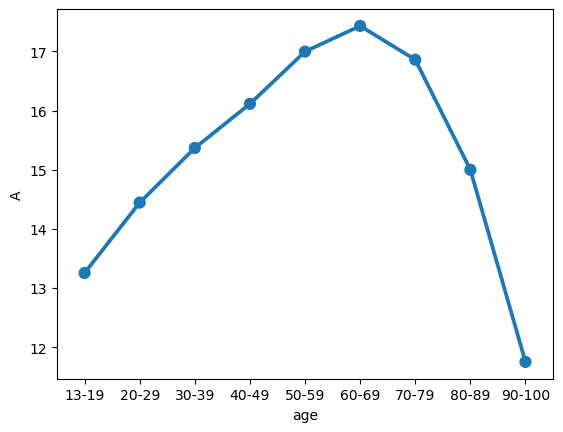

In [35]:
# Plot of age group vs their 'A' score
sns.pointplot(data=agevperson, x='age', y='A')

<AxesSubplot:xlabel='age', ylabel='O'>

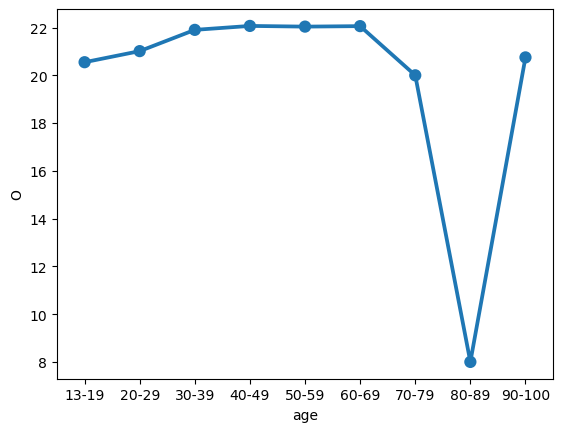

In [36]:
# Plot of age group vs their 'O' score
sns.pointplot(data=agevperson, x='age', y='O')

<AxesSubplot:xlabel='age', ylabel='E'>

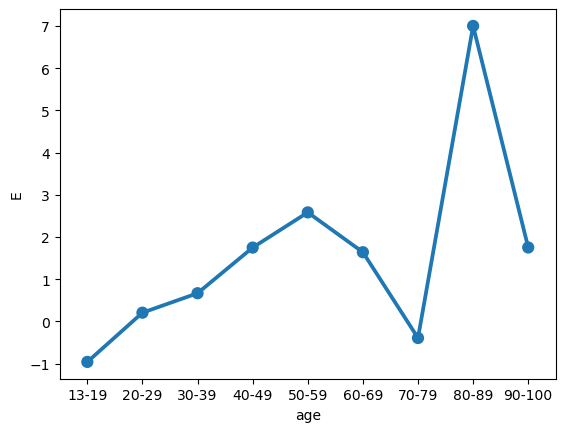

In [37]:
# Plot of age group vs their 'E' score
sns.pointplot(data=agevperson, x='age', y='E')

<AxesSubplot:xlabel='age', ylabel='N'>

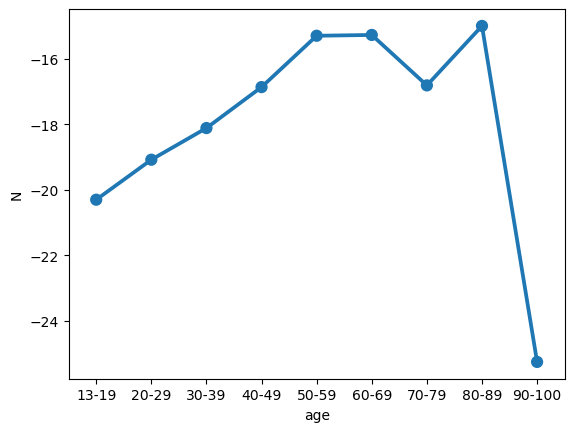

In [38]:
# Plot of age group vs their 'N' score
sns.pointplot(data=agevperson, x='age', y='N')

<AxesSubplot:xlabel='age', ylabel='C'>

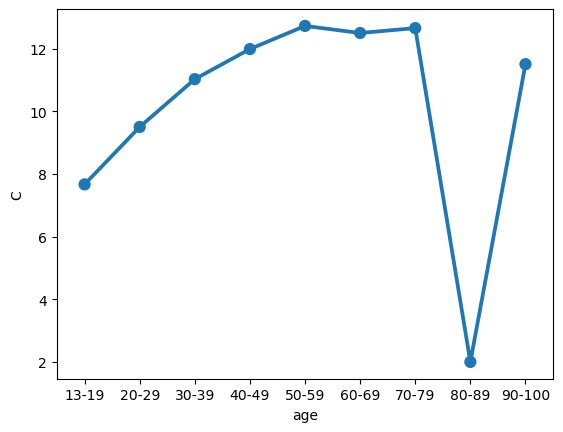

In [39]:
# Plot of age group vs their 'C' score
sns.pointplot(data=agevperson, x='age', y='C')